In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# file path
file_path= "D:/DATA_/world_bank_dataset.csv"
df = pd.read_csv(file_path)

df.describe()


,Year,GDP (USD),Population,Life Expectancy,Unemployment Rate (%),CO2 Emissions (metric tons per capita),Access to Electricity (%)
count,200.000000,2.000000e+02,2.000000e+02,200.000000,200.000000,200.000000,200.000000
mean,2014.500000,1.056867e+13,7.387908e+08,66.324500,13.271650,10.058200,72.876750
std,2.879489,5.547703e+12,4.389956e+08,9.818859,6.804166,5.712125,14.791291
min,2010.000000,1.011720e+12,9.970000e+06,50.500000,2.270000,0.810000,50.120000
25%,2012.000000,5.774120e+12,3.533775e+08,57.775000,6.810000,4.882500,60.315000
50%,2014.500000,1.050615e+13,7.216700e+08,64.900000,13.470000,9.745000,70.280000
75%,2017.000000,1.503451e+13,1.090860e+09,74.500000,18.542500,15.622500,86.297500
max,2019.000000,1.998377e+13,1.498060e+09,84.900000,24.790000,19.840000,99.760000


In [ ]:
# getting info on data
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   GDP (USD)                               200 non-null    float64
 3   Population                              200 non-null    float64
 4   Life Expectancy                         200 non-null    float64
 5   Unemployment Rate (%)                   200 non-null    float64
 6   CO2 Emissions (metric tons per capita)  200 non-null    float64
 7   Access to Electricity (%)               200 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 12.6+ KB
0              Brazil
1               Japan
2               India
3              Mexico
4               India
            ...      
195        

In [56]:
# list of country
print(df['Country'].unique())

['Brazil' 'Japan' 'India' 'Mexico' 'United Kingdom' 'China' 'Indonesia'
 'Canada' 'Argentina' 'Nigeria' 'Italy' 'Turkey' 'Saudi Arabia' 'Russia'
 'France' 'United States' 'Germany' 'South Korea' 'Australia'
 'South Africa']


In [57]:
print(df['Country'].value_counts())

Country
India             15
Saudi Arabia      13
Indonesia         13
United Kingdom    13
France            12
Argentina         12
Italy             12
United States     11
Japan             10
Mexico            10
Canada            10
Nigeria            9
Turkey             9
South Africa       8
China              8
Russia             8
Brazil             7
Germany            7
Australia          7
South Korea        6
Name: count, dtype: int64


In [73]:
# List of country with HIGH GDP with years
top_countries = df.nlargest(10, 'GDP (USD)')[['Country', 'Year', 'GDP (USD)']].reset_index(drop=True)
print(top_countries)

         Country  Year     GDP (USD)
0         Turkey  2012  1.998377e+13
1  United States  2019  1.997029e+13
2          Italy  2015  1.990075e+13
3          China  2011  1.965542e+13
4  United States  2010  1.963537e+13
5      Argentina  2012  1.962230e+13
6        Germany  2010  1.957240e+13
7          Japan  2010  1.942537e+13
8      Indonesia  2011  1.938571e+13
9   Saudi Arabia  2010  1.936959e+13


In [74]:
# List of country with LOW GDP 

lowest_GDP = df.nsmallest(10, 'GDP (USD)')[['Country', 'Year', 'GDP (USD)']].reset_index(drop=True)
print(lowest_GDP)

          Country  Year     GDP (USD)
0   United States  2012  1.011720e+12
1           India  2015  1.110880e+12
2         Germany  2015  1.157770e+12
3           Japan  2018  1.195940e+12
4          Brazil  2010  1.493220e+12
5       Argentina  2015  1.549940e+12
6    South Africa  2015  1.575330e+12
7       Indonesia  2014  1.622550e+12
8       Australia  2016  1.998330e+12
9  United Kingdom  2015  2.008500e+12


In [75]:
# average GDP
average_GDP = df['GDP (USD)'].mean()
print(average_GDP)

10568674550000.0


In [ ]:
# average country gdp
average_country_gdp = df.groupby('Country')['GDP (USD)'].mean().reset_index()
print(average_country_gdp)

           Country     GDP (USD)
0        Argentina  1.037410e+13
1        Australia  5.839284e+12
2           Brazil  8.353469e+12
3           Canada  1.248498e+13
4            China  1.146032e+13
5           France  1.046420e+13
6          Germany  7.282051e+12
7            India  9.990389e+12
8        Indonesia  7.583439e+12
9            Italy  1.367352e+13
10           Japan  1.117400e+13
11          Mexico  1.038013e+13
12         Nigeria  1.035661e+13
13          Russia  1.227068e+13
14    Saudi Arabia  1.212666e+13
15    South Africa  7.797570e+12
16     South Korea  1.078495e+13
17          Turkey  1.458832e+13
18  United Kingdom  8.996257e+12
19   United States  1.312703e+13


In [ ]:
# Highest GDP record per country
max_GDP = df.loc[df.groupby('Country')['GDP (USD)'].idxmax()]
print(max_GDP[['Country', 'Year', 'GDP (USD)']])

            Country  Year     GDP (USD)
122       Argentina  2012  1.962230e+13
90        Australia  2010  1.051194e+13
49           Brazil  2019  1.802609e+13
143          Canada  2013  1.879003e+13
81            China  2011  1.965542e+13
183          France  2013  1.818570e+13
130         Germany  2010  1.957240e+13
46            India  2016  1.864929e+13
161       Indonesia  2011  1.938571e+13
105           Italy  2015  1.990075e+13
160           Japan  2010  1.942537e+13
28           Mexico  2018  1.812030e+13
57          Nigeria  2017  1.933269e+13
184          Russia  2014  1.897915e+13
120    Saudi Arabia  2010  1.936959e+13
150    South Africa  2010  1.415021e+13
148     South Korea  2018  1.487227e+13
152          Turkey  2012  1.998377e+13
52   United Kingdom  2012  1.643361e+13
69    United States  2019  1.997029e+13


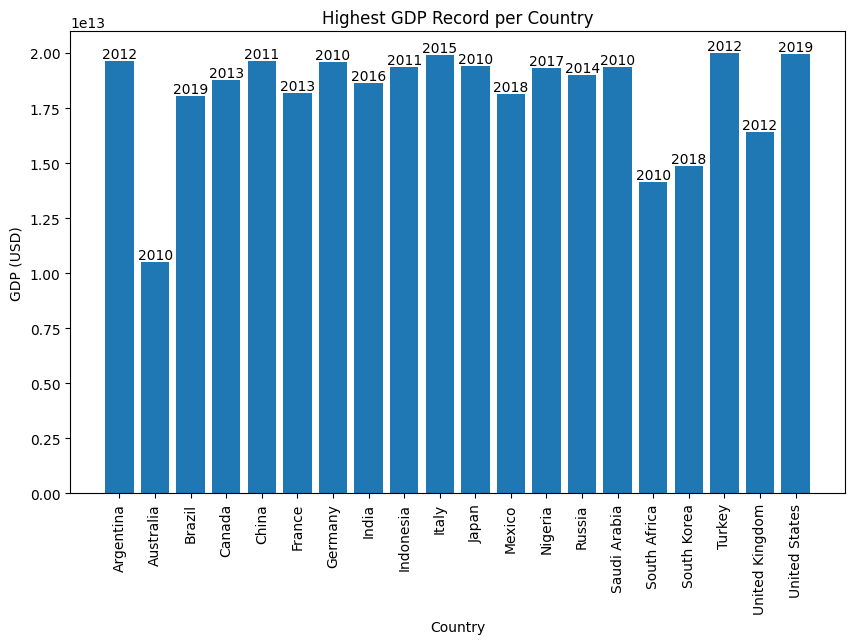

In [83]:
plt.figure(figsize=(10,6))
plt.bar(max_GDP['Country'], max_GDP['GDP (USD)'])
plt.xlabel('Country')
plt.ylabel('GDP (USD)')
plt.title('Highest GDP Record per Country')
plt.xticks(rotation=90)

# Add year as label on each bar
for i, (country, year, gdp) in enumerate(zip(max_GDP['Country'], max_GDP['Year'], max_GDP['GDP (USD)'])):
    plt.text(country, gdp, f"{year}", ha='center', va='bottom')

plt.show()

           Country  Unemployed People    Population  Avg Unemployment Rate (%)
16     South Korea       1.468920e+08  9.841967e+08                  14.925067
13          Russia       1.359434e+08  8.014125e+08                  16.962977
0        Argentina       1.258848e+08  8.461125e+08                  14.878018
18  United Kingdom       1.194751e+08  8.402123e+08                  14.219633
12         Nigeria       1.183041e+08  8.119689e+08                  14.570027
11          Mexico       1.159017e+08  7.600200e+08                  15.249826
6          Germany       1.150792e+08  8.520243e+08                  13.506566
8        Indonesia       1.148575e+08  7.205638e+08                  15.939951
19   United States       1.146863e+08  8.224318e+08                  13.944777
3           Canada       1.122517e+08  6.306470e+08                  17.799448
10           Japan       1.022628e+08  6.203970e+08                  16.483441
9            Italy       9.917897e+07  7.601692e+08 

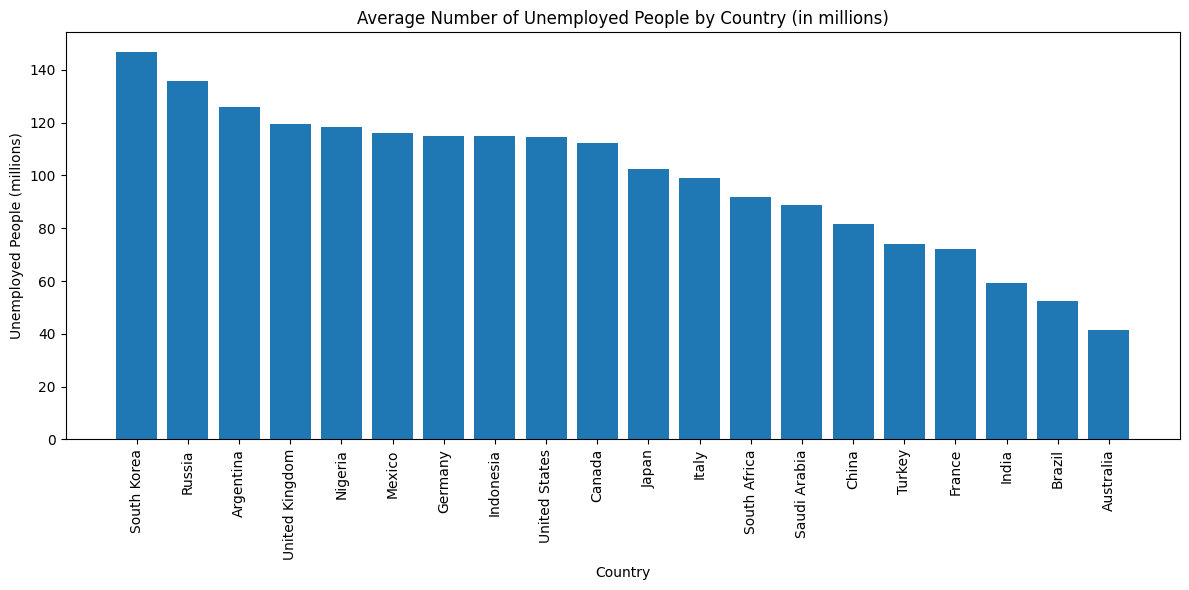

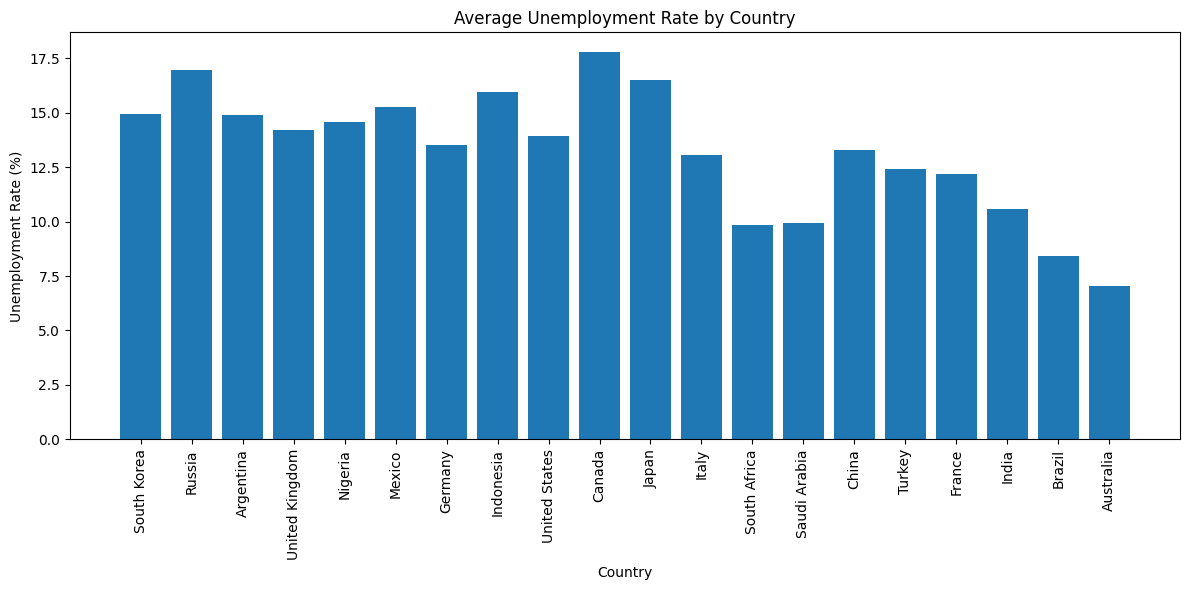

In [84]:
# Calculate the number of unemployed people
df['Unemployed People'] = df['Population'] * (df['Unemployment Rate (%)'] / 100)

# Group by country and calculate average unemployed people
country_unemployment = df.groupby('Country')[['Unemployed People', 'Population']].mean().reset_index()

# Calculate the average unemployment rate
country_unemployment['Avg Unemployment Rate (%)'] = (country_unemployment['Unemployed People'] / country_unemployment['Population']) * 100

# Sort by number of unemployed people in descending order
country_unemployment = country_unemployment.sort_values('Unemployed People', ascending=False)

# Display the results
print(country_unemployment)

# Visualize the results
plt.figure(figsize=(12, 6))
plt.bar(country_unemployment['Country'], country_unemployment['Unemployed People'] / 1e6)
plt.title('Average Number of Unemployed People by Country (in millions)')
plt.xlabel('Country')
plt.ylabel('Unemployed People (millions)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Visualize unemployment rates
plt.figure(figsize=(12, 6))
plt.bar(country_unemployment['Country'], country_unemployment['Avg Unemployment Rate (%)'])
plt.title('Average Unemployment Rate by Country')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

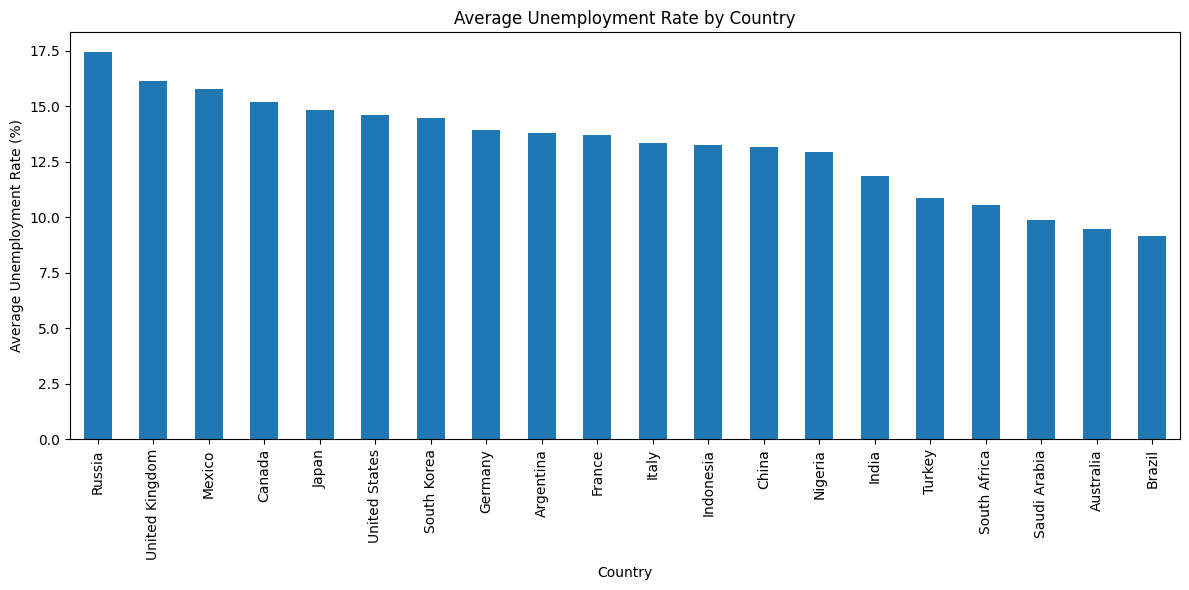

Country
Russia            17.447500
United Kingdom    16.145385
Mexico            15.766000
Canada            15.162000
Japan             14.803000
United States     14.610909
South Korea       14.478333
Germany           13.938571
Argentina         13.778333
France            13.688333
Italy             13.353333
Indonesia         13.227692
China             13.175000
Nigeria           12.948889
India             11.864000
Turkey            10.864444
South Africa      10.565000
Saudi Arabia       9.855385
Australia          9.468571
Brazil             9.141429
Name: Unemployment Rate (%), dtype: float64


In [ ]:
# Average Unemployment Rate for each country
avg_unemployment = df.groupby('Country')['Unemployment Rate (%)'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
avg_unemployment.plot(kind='bar')
plt.title('Average Unemployment Rate by Country')
plt.xlabel('Country')
plt.ylabel('Average Unemployment Rate (%)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

print(avg_unemployment)

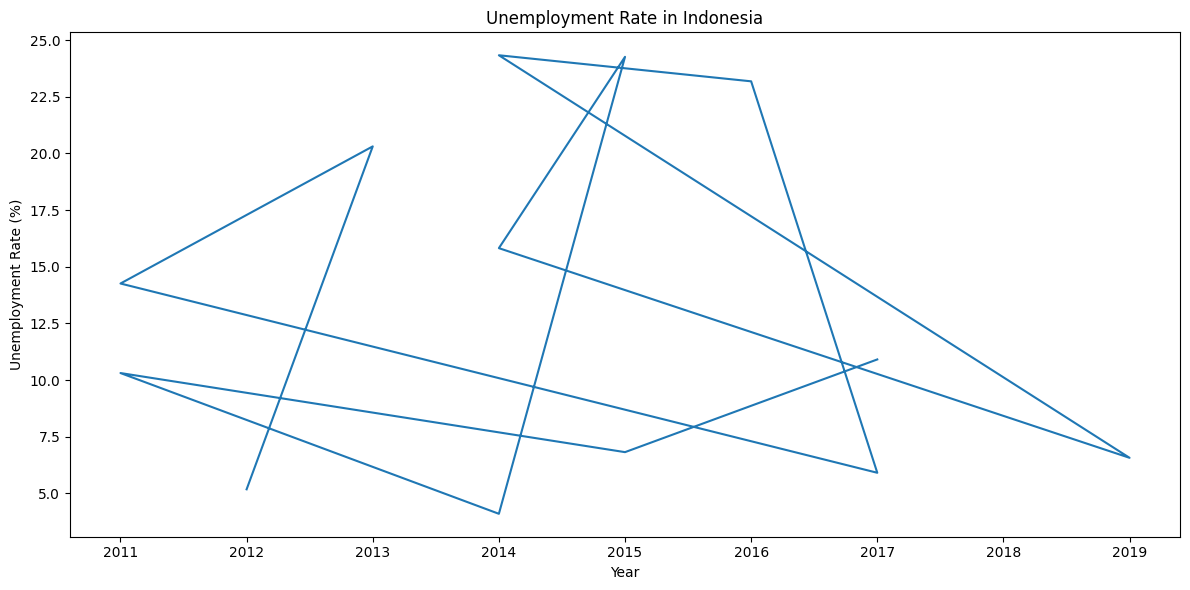

In [89]:
# Average Unemployment Rate for Indonesia each year
indonesia_unemployment = df[df['Country'] == 'Indonesia'][['Year', 'Unemployment Rate (%)']]
plt.figure(figsize=(12, 6))
plt.plot(indonesia_unemployment['Year'], indonesia_unemployment['Unemployment Rate (%)'])
plt.title('Unemployment Rate in Indonesia')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.tight_layout()
plt.show()

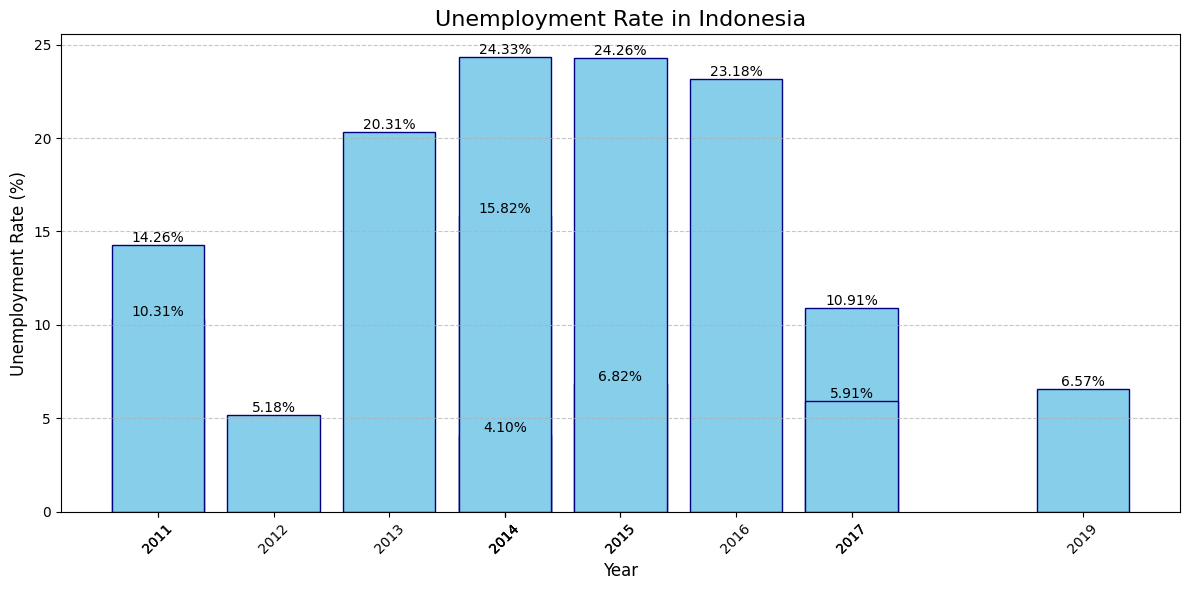

In [90]:
# Average Unemployment Rate for Indonesia each year
indonesia_unemployment = df[df['Country'] == 'Indonesia'][['Year', 'Unemployment Rate (%)']]

plt.figure(figsize=(12, 6))
plt.bar(indonesia_unemployment['Year'], indonesia_unemployment['Unemployment Rate (%)'], color='skyblue', edgecolor='navy')
plt.title('Unemployment Rate in Indonesia', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Unemployment Rate (%)', fontsize=12)

# Add value labels on top of each bar
for i, v in enumerate(indonesia_unemployment['Unemployment Rate (%)']):
    plt.text(indonesia_unemployment['Year'].iloc[i], v, f'{v:.2f}%', ha='center', va='bottom')

# Customize x-axis ticks
plt.xticks(indonesia_unemployment['Year'], rotation=45)

# Add grid lines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [94]:
indonesia_population = df[df['Country'] == 'Indonesia'][['Year', 'Population']]

# Display the population data for Indonesia
print(indonesia_population)

     Year    Population
7    2017  1.182400e+08
15   2015  3.489900e+08
41   2011  2.545800e+08
54   2014  4.446200e+08
55   2015  1.311010e+09
74   2014  5.705000e+08
109  2019  1.086020e+09
154  2014  1.384170e+09
156  2016  1.453920e+09
157  2017  7.660100e+08
161  2011  5.027800e+08
173  2013  5.499500e+08
182  2012  5.765400e+08


In [97]:
data = {
    'Year': [2011, 2012, 2013, 2014, 2015, 2016, 2017, 2019],
    'Population': [
        254580000,  # 2011
        576540000,  # 2012
        549950000,  # 2013
        1384170000, # 2014
        1311010000, # 2015
        1453920000, # 2016
        766010000,  # 2017
        1086020000  # 2019
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Sort the DataFrame by Year
df = df.sort_values(by='Year')

# Calculate the percentage growth
df['Population Growth (%)'] = df['Population'].pct_change() * 100

# Display the results
print(df)

   Year  Population  Population Growth (%)
0  2011   254580000                    NaN
1  2012   576540000             126.467122
2  2013   549950000              -4.611996
3  2014  1384170000             151.690154
4  2015  1311010000              -5.285478
5  2016  1453920000              10.900756
6  2017   766010000             -47.314158
7  2019  1086020000              41.776217
